In [1]:
#Procesamiento
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import re
from dateutil.parser import parse
#Visualización
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('pruebasetdatos.csv', sep=';')
df = pd.DataFrame(df)
df.head(2)

,TipoIdentificacionCodigo,NumeroIdentificacion,Nombre,Apellido,FecNacimiento,EstadoLaboralCodigo,Sexo,Genero,Estudiante,EstadoCodigo,PersonasACargo,Foto,FechaCreacionCliente,Estado
0,0,824670,GUILLERMO,RESTREPO,1984-04-02 04:18:06.197,1.0,0.0,Masculino,0.0,1.0,NaN,N,1990-01-01 00:00:00.000,No Aprobado
1,0,582024,DAVID,GALVEZ,1900-01-01 00:00:00.000,1.0,0.0,Masculino,0.0,1.0,NaN,N,1990-01-01 00:00:00.000,No Aprobado


# Análisis de calidad de datos del CSV compartido. 

#### Tamaño del set de datos inicial.

In [3]:
df.shape

(1045501, 14)

#### Nombre y tipo de variables en el set de datos - RawData

In [4]:
df.dtypes

TipoIdentificacionCodigo      int64
NumeroIdentificacion         object
Nombre                       object
Apellido                     object
FecNacimiento                object
EstadoLaboralCodigo         float64
Sexo                        float64
Genero                       object
Estudiante                  float64
EstadoCodigo                float64
PersonasACargo              float64
Foto                         object
FechaCreacionCliente         object
Estado                       object
dtype: object

#### Cantidad de variables por tipo - RawData

In [5]:
(df.dtypes.value_counts())

object     8
float64    5
int64      1
dtype: int64

#### Identificación de valores nulos.

In [6]:
(df.isnull().any())

TipoIdentificacionCodigo    False
NumeroIdentificacion        False
Nombre                       True
Apellido                     True
FecNacimiento               False
EstadoLaboralCodigo          True
Sexo                         True
Genero                       True
Estudiante                   True
EstadoCodigo                 True
PersonasACargo               True
Foto                        False
FechaCreacionCliente        False
Estado                      False
dtype: bool

#### Cantidad y porcentaje de valores nulos por variales.

In [7]:
largo = len(df)
catNull = (df.isnull().sum())
catNull = pd.DataFrame(catNull)
catNull.columns = ['Cant Null']
catNull['% valores Null'] = ((catNull['Cant Null']/largo)*100).round(2)
catNull

,Cant Null,% valores Null
TipoIdentificacionCodigo,0,0.00
NumeroIdentificacion,0,0.00
Nombre,48,0.00
Apellido,41099,3.93
FecNacimiento,0,0.00
EstadoLaboralCodigo,2371,0.23
Sexo,2371,0.23
Genero,48149,4.61
Estudiante,2373,0.23
EstadoCodigo,780465,74.65


#### Grafica: proporción de valores nulos por variable.

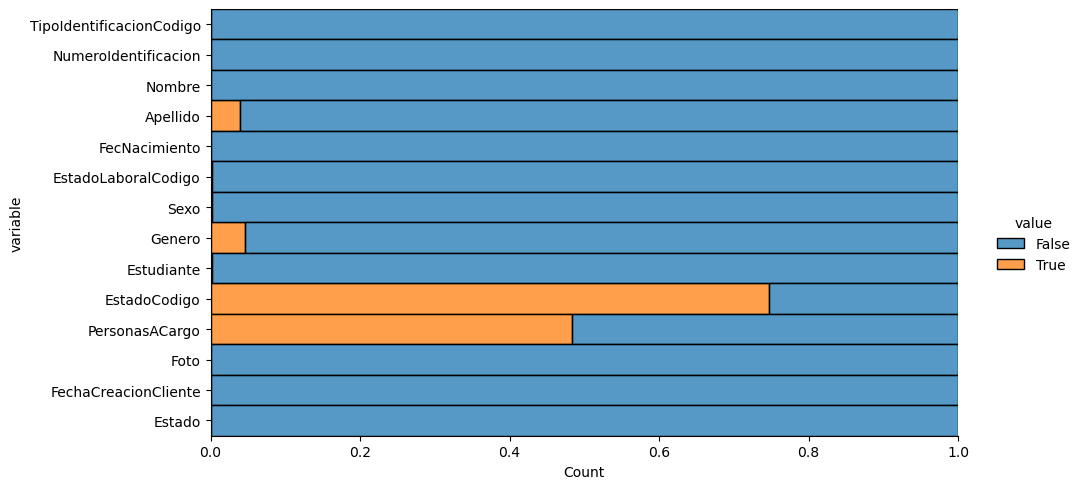

In [8]:
(
    df.isnull()
    .melt().pipe(
        lambda i:(
            sns.displot(
                data = i,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

In [9]:
df_1 = df.copy()

### Busqueda de otros valores faltantes o errores diferentes a los que identifica el programa inicialmente.

#### Identificación de errores columna "NumeroIdentificacion"

In [10]:
#Identificación de Letras.
df_1['LetEnId'] = df_1['NumeroIdentificacion'].str.count('[a-zA-Z]')
#Identificación de Caracteres especiales.
df_1['CarEnId'] = df_1['NumeroIdentificacion'].str.count('[^a-zA-Z0-9 ]')
df_1['Error_Id'] = df_1.apply(lambda x: 0 if (x['LetEnId'] == 0 and x['CarEnId'] == 0) else 1, axis=1)
E_NumIde = len(df_1[df_1['Error_Id'] == 1 ])
print('Cantidad de errores columna NumeroIdentificacion:',E_NumIde)

Cantidad de errores columna NumeroIdentificacion: 151428


#### Identificación de errores columna "Nombre"

In [11]:
patron = r"[^a-zA-Z0-9ñÑáéíóúüÁÉÍÓÚÜ\s]"
#Identificar números.
df_1['NumNomb'] = df_1['Nombre'].apply(lambda x: str(x).isnumeric())
#Identificar Caracteres especiales.
df_1['EspNom'] = df_1['Nombre'].apply(lambda x: bool(re.search(patron, str(x))))
df_1['Error_Nombre'] = df_1.apply(lambda x: False if (x['NumNomb'] == False and x['EspNom'] == False) else True, axis=1)
E_Nombre = len(df_1[df_1['Error_Nombre'] == True ])
print('Cantidad de errores en la columna Nombre:', E_Nombre)

Cantidad de errores en la columna Nombre: 408


#### Identificación de errores columna "Apellido"

In [12]:
#Identificar números.
df_1['NumApe'] = df_1['Apellido'].apply(lambda x: str(x).isnumeric())
#Identificar Caracteres especiales.
df_1['EspApll'] = df_1['Apellido'].apply(lambda x: bool(re.search(patron, str(x))))
df_1['Error_Apell'] = df_1.apply(lambda x: False if (x['NumApe'] == False and x['EspApll'] == False) else True, axis=1)
E_Apellido = len(df_1[df_1['Error_Apell'] == True ])
print('Cantidad de errores en la columna Apellido:', E_Apellido)

Cantidad de errores en la columna Apellido: 2260


#### Identificación de errores columna "FecNacimiento"

In [13]:
ValidaFecha_1 = pd.to_datetime(df_1['FecNacimiento'], errors='coerce').notnull()
df_1['ValidaFecha'] = ValidaFecha_1
E_FecNac = len(df_1[df_1['ValidaFecha'] == False ])
print('Cantidad de errores en la columna FecNacimiento:', E_FecNac)

Cantidad de errores en la columna FecNacimiento: 8


#### Identificación de errores columna "FechaCreacionCliente"

In [14]:
ValidaFecha_2 = pd.to_datetime(df_1['FechaCreacionCliente'], errors='coerce').notnull()
df_1['ValidaFechaCre'] = ValidaFecha_2
E_FecCre = len(df_1[df_1['ValidaFechaCre'] == False ])
print('Cantidad de errores en la columna FechaCreacionCliente:', E_FecCre)

Cantidad de errores en la columna FechaCreacionCliente: 0


In [15]:
infoNull = catNull.copy()
Nombreindices = infoNull.index.tolist()
Cant_Error = pd.DataFrame([0, E_NumIde, E_Nombre, E_Apellido, E_FecNac, 0, 0, 0, 0, 0, 0, 0, E_FecCre,0], index=Nombreindices)
ErrorTotal = pd.concat([infoNull, Cant_Error], axis=1)
ErrorTotal = ErrorTotal.rename(columns={0:'Cant Errores'})
ErrorTotal['% Cant Errores'] = ((ErrorTotal['Cant Errores']/largo)*100).round(2)
ErrorTotal

,Cant Null,% valores Null,Cant Errores,% Cant Errores
TipoIdentificacionCodigo,0,0.00,0,0.00
NumeroIdentificacion,0,0.00,151428,14.48
Nombre,48,0.00,408,0.04
Apellido,41099,3.93,2260,0.22
FecNacimiento,0,0.00,8,0.00
EstadoLaboralCodigo,2371,0.23,0,0.00
Sexo,2371,0.23,0,0.00
Genero,48149,4.61,0,0.00
Estudiante,2373,0.23,0,0.00
EstadoCodigo,780465,74.65,0,0.00


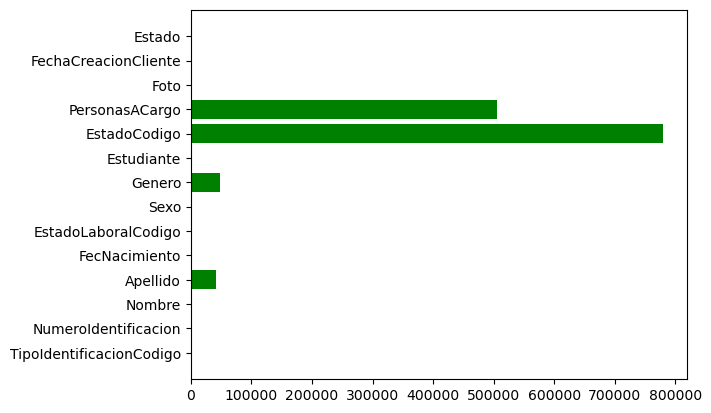

In [16]:
ColNull = ErrorTotal.loc[:,'Cant Null']
ColErr = ErrorTotal.loc[:,'Cant Errores']
plt.barh(Nombreindices, ColNull, color='g')
plt.show()

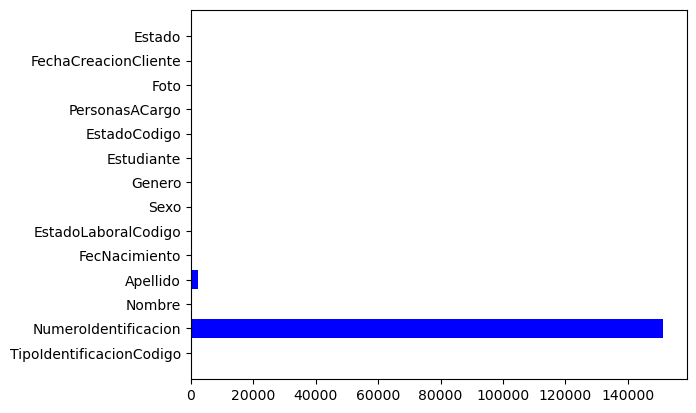

In [17]:
plt.barh(Nombreindices, ColErr, color='b')
plt.show()

# Procesmiento y limpieza de los datos. 

In [19]:
df_2 = df.copy()

In [20]:
#Limpiar columna NumeroIdentificacion
df_2['NumeroIdentificacion'] = df_2['NumeroIdentificacion'].astype(str).str.replace('[^\d]+', '', regex=True)
#Limpiar y convertir a title datos columna Nombre
df_2['Nombre'] = df_2['Nombre'].apply(str)
df_2['Nombre'] = df_2['Nombre'].str.replace(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+', '').str.title()
#Limpiar y convertir a title datos columna Apellido
df_2['Apellido'] = df_2['Apellido'].apply(str)
df_2['Apellido'] = df_2['Apellido'].str.replace(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+', '').str.title()
#Transformar información a "datetime" de la columna FecNacimiento
df_2['FecNacimiento'] = df_2['FecNacimiento'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').strftime('%d-%m-%Y'))
#Transformar información a "datetime" de la columna FecNacimiento
df_2['FechaCreacionCliente'] = df_2['FechaCreacionCliente'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').strftime('%d-%m-%Y'))

C:\Users\chech\AppData\Local\Temp\ipykernel_7376\1195926388.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['Nombre'] = df_2['Nombre'].str.replace(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+', '').str.title()
C:\Users\chech\AppData\Local\Temp\ipykernel_7376\1195926388.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['Apellido'] = df_2['Apellido'].str.replace(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+', '').str.title()


In [21]:
#Correción valores columnas 'Genero' y 'sexo'
df_2['Genero'] = df_2['Genero'].replace(['Femenino', 'Female'], 'mujer')
df_2['Genero'] = df_2['Genero'].replace(['Male', 'Masculino'], 'hombre')
df_2['Genero'] = df_2['Genero'].replace([' '], 'NULL')

In [ ]:
df_1.to_csv('informe413.xlsx')